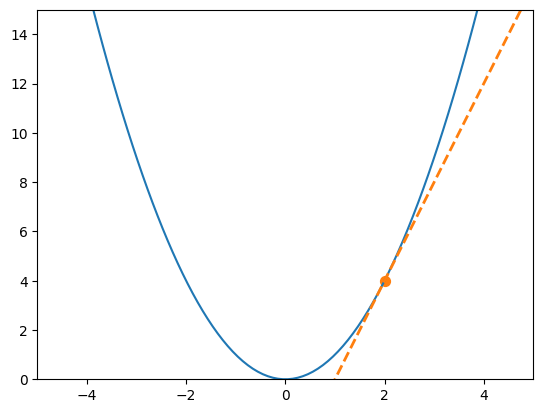

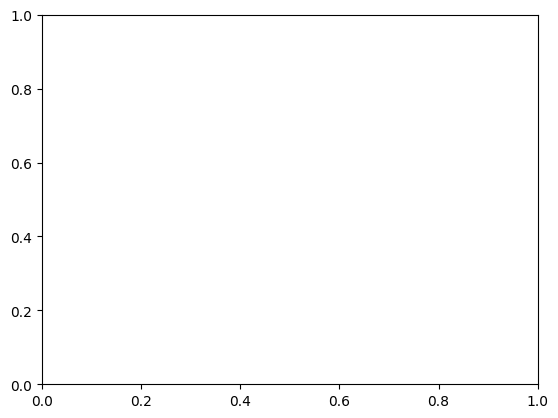

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
%matplotlib inline

x = np.linspace(-5,5,100)

def f(x):
    return x**2

def fd(x):
    return 2*x

def tangent(x,x1,y1):
    return fd(x1)*(x - x1) + y1

x1 = 2
y1= f(x1)

y = list(map(f,x))

plt.ylim(0, 15)
plt.xlim(-5,5)
plt.plot(x,f(x))

plt.scatter(x1, y1, color='C1', s=50)
plt.plot(x, tangent(x, x1, y1), 'C1--', linewidth = 2)

fig, ax = plt.subplots()
ax.add_patch(Rectangle((1, 1), 2, 6))
plt.show()

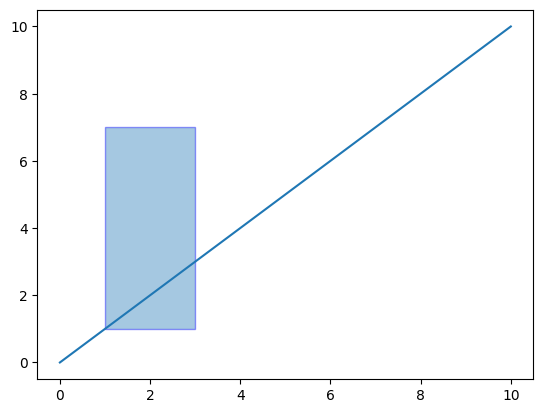

In [36]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

#define Matplotlib figure and axis
fig, ax = plt.subplots()

#create simple line plot
ax.plot([0, 10],[0, 10])

#add rectangle to plot
ax.add_patch(Rectangle((1, 1), 2, 6,alpha=0.4, ec='b', lw=1))

#display plot
plt.show()

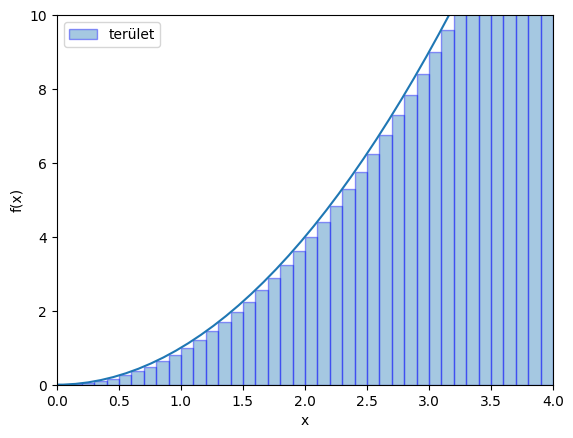

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.animation as animation

%matplotlib inline

x = np.linspace(-5,5,100)

def f(x):
    return x**2

def fd(x):
    return 2*x

def tangent(x,x1,y1):
    return fd(x1)*(x - x1) + y1

x1 = 2
y1= f(x1)

y = list(map(f,x))
fig, ax = plt.subplots()
plt.ylim(0, 10)
plt.xlim(0,4)
ax.plot(x,f(x))

low = 0
high = 4


n = 40

h = (high-low)/n
k =0
for i in range(n):
    if i == 0:
        ax.add_patch(Rectangle((k, 0), h, f(k),alpha=0.4, ec='b', lw=1, label = "terület"))    
    else:
        ax.add_patch(Rectangle((k, 0), h, f(k),alpha=0.4, ec='b', lw=1))    
    k += h

plt.xlabel("x")
plt.ylabel("f(x)")

plt.legend()
#plt.savefig(f'plot_{n}.png')


plt.show()

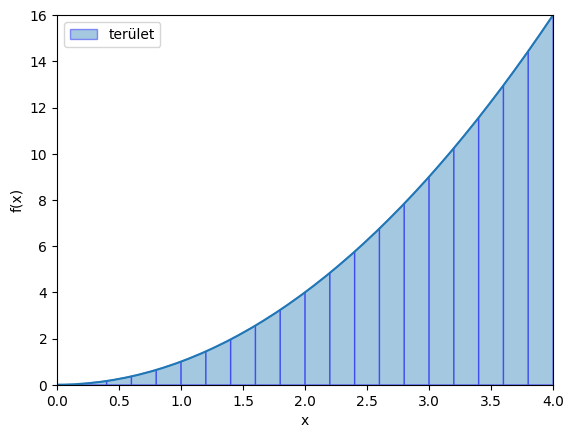

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import matplotlib.animation as animation

%matplotlib inline

x = np.linspace(-5,5,100)

def f(x):
    return x**2

def fd(x):
    return 2*x

def tangent(x,x1,y1):
    return fd(x1)*(x - x1) + y1

x1 = 2
y1= f(x1)

y = list(map(f,x))
fig, ax = plt.subplots()
plt.ylim(0, 16)
plt.xlim(0,4)
ax.plot(x,f(x))

low = 0
high = 4


n = 20

h = (high-low)/n
k =0
for i in range(n):

    # Parallelogram
    #x = [k,k,k+h,k+h]
    #y = [0,f(k),0,f(k+h)]

    x = [k,k+h,k+h,k]
    y = [0,0,f(k+h),f(k)]
    
    
    if i == 0:
        ax.add_patch(Polygon(xy=list(zip(x,y)),alpha=0.4, ec='b', lw=1, label = "terület"))    
    else:
        ax.add_patch(Polygon(xy=list(zip(x,y)),alpha=0.4, ec='b', lw=1) )   
    k += h

plt.xlabel("x")
plt.ylabel("f(x)")

plt.legend()
#plt.savefig(f'plots/plot_trapez_{n}.png')


plt.show()

0
0
1
2
3
4
5
6
7
8
9


0


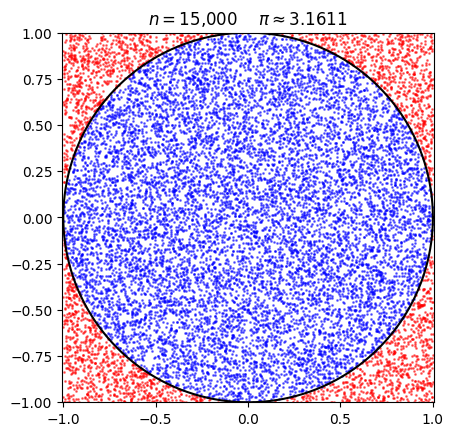

In [143]:
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

num_of_frames = 10
num_of_samples = 150_000

x = uniform(low=-1.0, high=1.0,size=num_of_samples)
y = uniform(low=-1.0, high=1.0, size=num_of_samples)

radius = 1.0
theta = np.linspace(0, 2 * np.pi, 1000)
x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)

fig, ax = plt.subplots(figsize=(4.8, 4.8))

def animate(i):
    print(i)
    ax.clear()
    x_samples = x[:int(num_of_samples*(i+1)/num_of_frames)]
    y_samples = y[:int(num_of_samples * (i+1) / num_of_frames)]
    inside_circle = np.sqrt(x_samples ** 2 + y_samples ** 2) <= 1
    x_inside = x_samples[inside_circle]
    x_outside = x_samples[~inside_circle]
    y_inside = y_samples[inside_circle]
    y_outside = y_samples[~inside_circle]
    ax.scatter(x_inside, y_inside, 1, c='b', alpha=0.5)
    ax.scatter(x_outside, y_outside, 1, c='r', alpha=0.5)
    ax.plot(x_circle, y_circle, 'k')
    ax.axis('equal')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_title(fr'$n = ${len(x_samples):,}    $\pi \approx {4*len(x_inside)/len(x_samples):.4f}$')
    return


ani = FuncAnimation(fig, animate, interval=200, repeat=True, frames=num_of_frames)
from IPython.display import HTML
HTML(ani.to_jshtml())
#ani.save("TLI.gif", dpi=300, writer=PillowWriter(fps=5))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.animation import FuncAnimation, PillowWriter
import random
%matplotlib inline

x = np.linspace(-5,5,100)

def f(x):
    return x**2

def fd(x):
    return 2*x

def tangent(x,x1,y1):
    return fd(x1)*(x - x1) + y1

x1 = 2
y1= f(x1)

y = list(map(f,x))
fig, ax = plt.subplots()

x_inside = []
y_inside = []
x_outside = []
y_outside = []

def init(i):
    pass

def animate(i):
    global x, x_inside, y_inside, x_outside, y_outside
    ax.clear()
    plt.ylim(0, 16)
    plt.xlim(0,4)
    ax.plot(x,f(x), color='black')
    
    low = 0
    high = 4
    
    x1,y1 = [1,1],[-1,20]
    x2,y2 = [3,3],[-1,20]
    plt.plot(x1,y1,marker='o',label='x', c='g')
    plt.plot(x2,y2,marker='o',label='x', c='g')
    
    plt.xlabel("x")
    plt.ylabel("f(x)")


    for i in range(1500):
        x3 = 1 + 2*random.randint(0,100000)/100000
        y3 = 16*random.randint(0,100000)/100000
    
        if(y3 <= f(x3)):
            x_inside.append(x3) 
            y_inside.append(y3)
        else:
            x_outside.append(x3)
            y_outside.append(y3)
    
    if(i % 10 == 0):
        print(i)
    
    ax.scatter(x_inside, y_inside, 1, c='b', alpha=0.5)
    ax.scatter(x_outside, y_outside, 1, c='r', alpha=0.5)
    
    #ax.set_title(fr'$n = ${len(x_samples):,}    $\pi \approx {4*len(x_inside)/len(x_samples):.4f}$')
    return
#plt.plot(x3,y3, marker='ro')


ani = FuncAnimation(fig, animate, interval=100, repeat=True, frames=60)
#anim = animation.FuncAnimation(fig, animate, frames = 20, interval = 20, blit = True)  

#plt.savefig(f'plots/plot_trapez_{n}.png')
ani.save("plots/TLI4.gif", dpi=300, writer=PillowWriter(fps=8))
from IPython.display import HTML
HTML(ani.to_jshtml())

#plt.show()